# Contexto

La fibrilación auricular (AF) es una arritmia frecuente que reduce la calidad de vida y provoca complicaciones como el ictus embólico y la insuficiencia cardíaca. Los avances en aprendizaje automático y profundo han mejorado la precisión diagnóstica, pero es crucial que los modelos sean robustos y aplicables en poblaciones diversas. Aunque existen varias bases de datos de ECG, ninguna incluye muestras de la población japonesa. El conjunto de datos SHDB-AF se recopiló para evaluar modelos de detección de eventos de AF, obteniendo un F1 de 0.92 con ArNet2 y 0.93 con RawECGNet.

# Sobre la base de datos

Se recopilaron 147 grabaciones Holter, seleccionando 100 de pacientes únicos con criterios basados en edad, sexo y diagnóstico de fibrilación auricular (AF). Las grabaciones fueron filtradas y muestreadas a 200 Hz, con anotaciones de latidos utilizando el algoritmo Pan y Tompkins. La anotación manual clasificó arritmias supraventriculares, centrada en AF, flutter auricular y taquicardia auricular. Se garantizó la confidencialidad de los pacientes, asignándoles identificadores aleatorios y siguiendo regulaciones de privacidad.

# 01 Obtain

In [1]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
# import loadmat from scipy.io

from scipy.io import loadmat

In [2]:
# load 12726m.info. this file is a plain text file

info = open('12726m.info').read()

# print the content of the info file

print(info)

Source: record prcp/12726  Start: [15:08:24.000]
val has 1 row (signal) and 2500 columns (samples/signal)
Duration:     0:10
Sampling frequency: 250 Hz  Sampling interval: 0.004 sec
Row	Signal	Gain	Base	Units
1	ECG	6554	0	mV

To convert from raw units to the physical units shown
above, call the 'rdmat.m' function from the wfdb-matlab
toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



## Observaciones

- La frecuencia de muestreo es 250 Hz
- Se tiene 10 segundos de señal
- Se tiene 2500 muestras
- La ganancia es de 6554
- La base de tiempo es 0

In [3]:
# load 12726m.mat 

data = loadmat('12726m.mat')

## imprimir los campos de data

#print(data.keys())

ecg = data['val']

print(ecg)

[[-12996 -13040 -12916 ... -12772 -12912 -13192]]


# 02 Data transformation

- Normalizar la señal ECG para que quede entre -1 y 1
- Transformar el objeto ECG a un arreglo 1D

In [4]:
base=0
ganancia=6554
ecg=(ecg-base)/ganancia # normalizar la señal ecg para que quede entre -1 y 1

print(ecg)

[[-1.9829112  -1.98962466 -1.97070491 ... -1.9487336  -1.9700946
  -2.0128166 ]]


In [5]:
# tranform the ecg signal to a 1D numpy array

ecg = ecg.flatten()

print(ecg)

[-1.9829112  -1.98962466 -1.97070491 ... -1.9487336  -1.9700946
 -2.0128166 ]


# 03 Data Exploration

In [6]:
# summary statistics for ecg

print('mean:', np.mean(ecg))
print('std:', np.std(ecg))
print('min:', np.min(ecg))
print('max:', np.max(ecg))

print('numero de muestras :',ecg.size)

mean: -1.8742274031126027
std: 0.15738772819206362
min: -2.0970399755874274
max: -0.8306377784559048
numero de muestras : 2500


# 04 Visualization

In [7]:
# crear un vector de tiempo para la señal ecg
# vector de tiempo tiene la misma cantidad de muestras que la señal ecg
fs = 250 # frecuencia de muestreo
t = np.arange(0, ecg.size/fs, 1/fs) # vector de tiempo
print(t)
print(t.size)

[0.000e+00 4.000e-03 8.000e-03 ... 9.988e+00 9.992e+00 9.996e+00]
2500


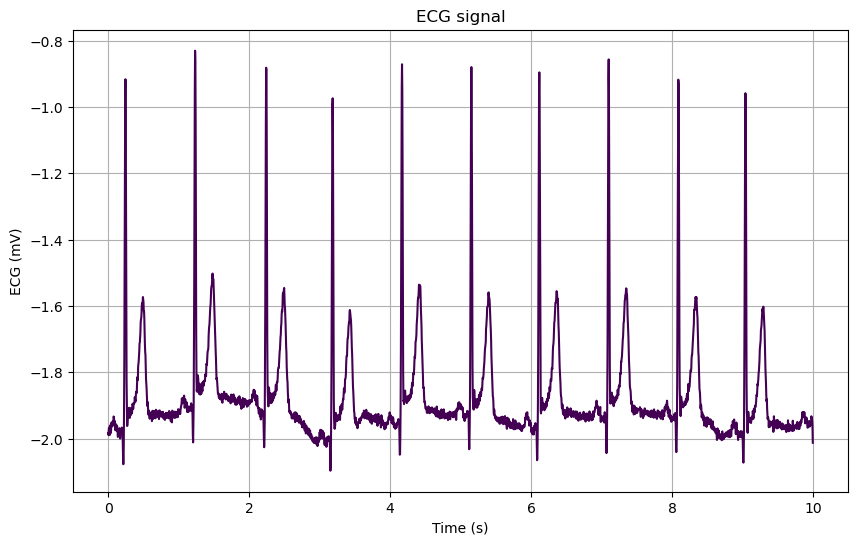

In [8]:
# plot the ecg signal

# change the color of the plot
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, 10)))

# make a bigger plot 
plt.figure(figsize=(10, 6))


plt.plot(t, ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG signal')
plt.grid()
plt.show()